In [1]:
import keras

Using TensorFlow backend.


In [2]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D, AveragePooling2D, SeparableConv2D
from keras.utils import np_utils

from keras.datasets import mnist

In [3]:
from keras.callbacks import ModelCheckpoint
from keras.callbacks import CSVLogger 
from keras.callbacks import History 
from keras.callbacks import ReduceLROnPlateau
from keras.preprocessing.image import ImageDataGenerator

## Load pre-shuffled MNIST data into train and test sets

In [4]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

(60000, 28, 28)


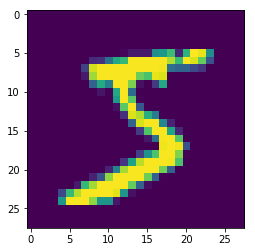

In [5]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [6]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [7]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [8]:
X_train[1]

array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        

In [9]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [10]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [11]:
Y_train[:10]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

### Define the model

In [14]:
file_prefix               = "model_01_"  

In [15]:
filepath = file_prefix + r".best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')

In [16]:
csv_log_file = file_prefix + r".csv"
csv_logger   = keras.callbacks.CSVLogger(csv_log_file, separator=',', append=True)

In [18]:
history = History()

In [19]:
#callbacks_list = [checkpoint, history, csv_logger, my_logger]
#callbacks_list = [history, csv_logger, my_logger]
callbacks_list = [checkpoint, history]

In [25]:
model_04 = Sequential()

 
model_04.add(Convolution2D(32, 5, 5, activation='relu', input_shape=(28,28,1)))
#model_03.add(Convolution2D(64, 1, 5, activation='relu'))
#model.add(Dropout(0.2))
model_04.add(SeparableConv2D(128, 3, 3, activation='relu'))
#model_03.add(Convolution2D(64, 1, 3, activation='relu'))
#model_03.add(Convolution2D(64, 3, 1, activation='relu'))
model_04.add(Dropout(0.2))
model_04.add(MaxPooling2D((2,2), strides= 2))
model_04.add(Convolution2D(32, 1, 1))
model_04.add(SeparableConv2D(32, 3, 3, activation='relu'))
model_04.add(Dropout(0.2))
model_04.add(SeparableConv2D(64, 3, 3, activation='relu'))
model_04.add(Dropout(0.2))
model_04.add(Convolution2D(32, 1, 1))
model_04.add(MaxPooling2D((2,2), strides= 2))
model_04.add(SeparableConv2D(64, 3, 3))
model_04.add(Dropout(0.2))
model_04.add(Flatten())
model_04.add(Dense(10))
model_04.add(Activation('softmax'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (5, 5), activation="relu", input_shape=(28, 28, 1...)`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `SeparableConv2D` call to the Keras 2 API: `SeparableConv2D(128, (3, 3), activation="relu")`
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (1, 1))`
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `SeparableConv2D` call to the Keras 2 API: `SeparableConv2D(32, (3, 3), activation="relu")`
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: Update your `SeparableConv2D` call to the Keras 2 API: `SeparableConv2D(64, (3, 3), activation="relu")`
  from ipykernel import 

In [26]:
model_04.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [27]:
model_04.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 24, 24, 32)        832       
_________________________________________________________________
separable_conv2d_5 (Separabl (None, 22, 22, 128)       4512      
_________________________________________________________________
dropout_5 (Dropout)          (None, 22, 22, 128)       0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 11, 11, 128)       0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 11, 11, 32)        4128      
_________________________________________________________________
separable_conv2d_6 (Separabl (None, 9, 9, 32)          1344      
_________________________________________________________________
dropout_6 (Dropout)          (None, 9, 9, 32)          0         
__________

In [28]:
model_04.fit(X_train, Y_train, batch_size=100, epochs=30, verbose=1, validation_data=(X_test, Y_test), callbacks=callbacks_list)

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 18s 293us/step - loss: 0.5960 - acc: 0.8008 - val_loss: 0.1609 - val_acc: 0.9518

Epoch 00001: val_acc improved from -inf to 0.95180, saving model to model_01_.best.hdf5
Epoch 2/30
60000/60000 [==============================] - 17s 278us/step - loss: 0.1698 - acc: 0.9484 - val_loss: 0.0916 - val_acc: 0.9718

Epoch 00002: val_acc improved from 0.95180 to 0.97180, saving model to model_01_.best.hdf5
Epoch 3/30
60000/60000 [==============================] - 17s 278us/step - loss: 0.1164 - acc: 0.9642 - val_loss: 0.0648 - val_acc: 0.9795

Epoch 00003: val_acc improved from 0.97180 to 0.97950, saving model to model_01_.best.hdf5
Epoch 4/30
60000/60000 [==============================] - 17s 279us/step - loss: 0.0949 - acc: 0.9711 - val_loss: 0.0607 - val_acc: 0.9817

Epoch 00004: val_acc improved from 0.97950 to 0.98170, saving model to model_01_.best.hdf5
Epoch 5/30
60000/60000 [=====

In [30]:
from keras.models import load_model

In [31]:
model = load_model(filepath)

In [32]:
score = model.evaluate(X_test, Y_test, verbose=0)

## Evaluating the model with the highest accuracy

In [33]:
print(score)

[0.022381674018141347, 0.9929]
